# Histograma de Imagens RM

### Exibição das Imagens em GRID

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


from matplotlib import pyplot as plt

def showImages(imgsArray, titlesArray, size, grid=(1,1)):
    y, x = grid
    fig, axes = plt.subplots(y, x, figsize=size)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else np.array([axes])

    if len(imgsArray) != len(titlesArray):
        print("ERRO: O número de imagens e títulos deve ser o mesmo!")
        return

    for idx, (img, title) in enumerate(zip(imgsArray, titlesArray)):
        if len(img.shape) == 2:
            axes[idx].imshow(img, cmap='gray')
        else:
            axes[idx].imshow(img)
        axes[idx].set_title(title, fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
        if len(title) == 0:
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

### Histograma de imagem em tons de cinza

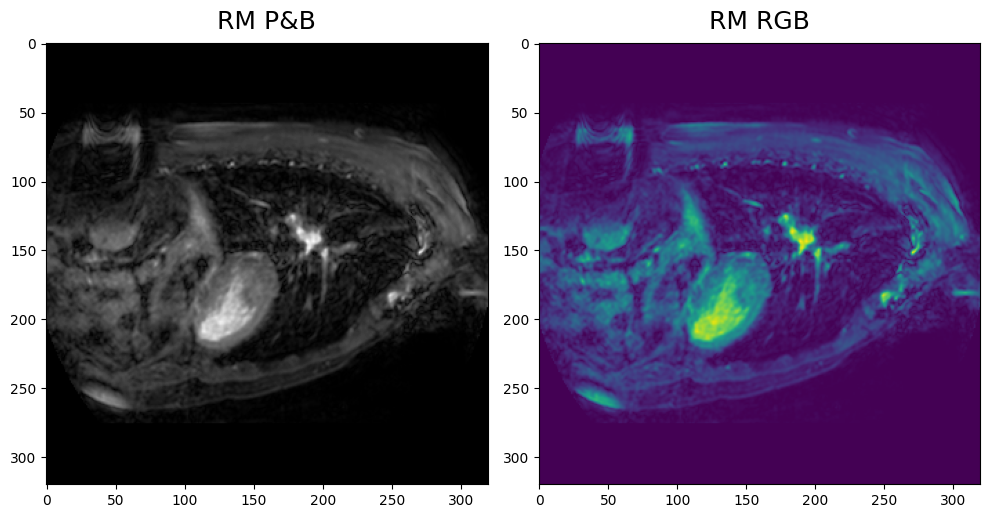

In [3]:
imageBW = cv2.imread('la_023.png', 0)
imageRGB = cv2.imread('la_023.png')
imageRGB = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2RGB)

showImages([imageBW, imageRGB], ["RM P&B", "RM RGB"], size=(10, 10), grid=(1,2))

#### Histograma de Escala de Cinza

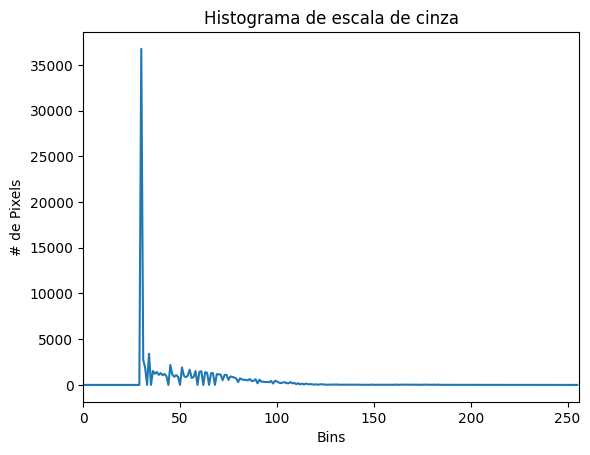

In [5]:
image = cv2.imread('la_023.png')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])


plt.figure()
plt.title("Histograma de escala de cinza")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

#### Histograma Colorido RGB

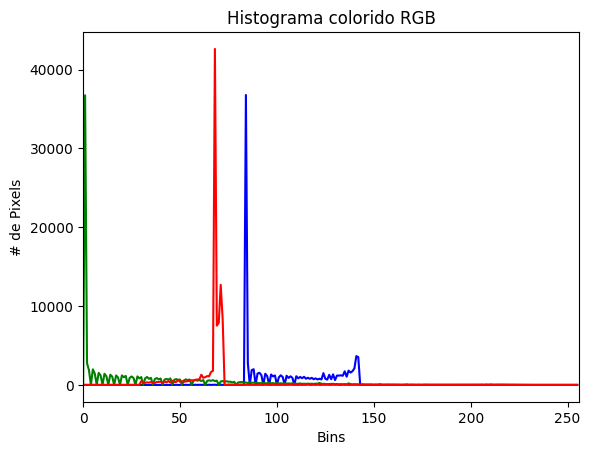

In [6]:
image = cv2.imread('la_023.png')

colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = color)
    plt.xlim([0, 256])

plt.title("Histograma colorido RGB")
plt.xlabel("Bins")
plt.ylabel("# de Pixels")
plt.show()

#### Divisão da Imagem RM em Canais de Cor RGB

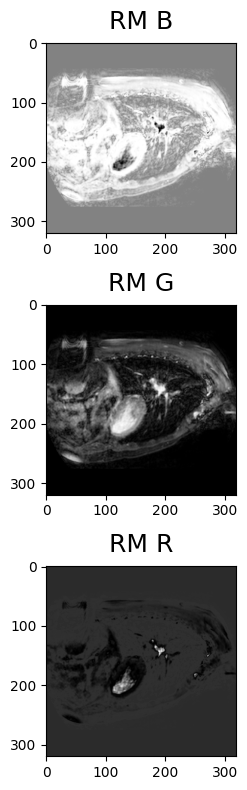

In [8]:
image = cv2.imread('la_023.png')

B, G, R = cv2.split(image)


showImages([B, G, R], ["RM B", "RM G", "RM R"], size=(8, 8), grid=(3,1))

### Histograma de máscara (P&B)

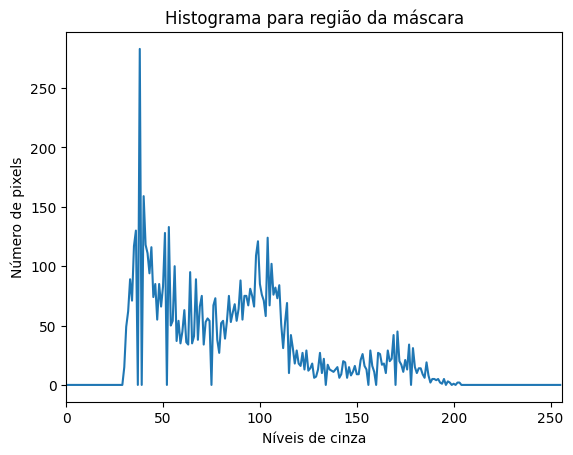

In [11]:
image = cv2.imread('la_023.png', cv2.IMREAD_GRAYSCALE)


mask = np.zeros(image.shape[:2], np.uint8)


mask[150:230, 100:190] = 255


hist_mask = cv2.calcHist([image], [0], mask, [256], [0, 256])


plt.figure()
plt.title('Histograma para região da máscara')
plt.xlabel('Níveis de cinza')
plt.ylabel('Número de pixels')
plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

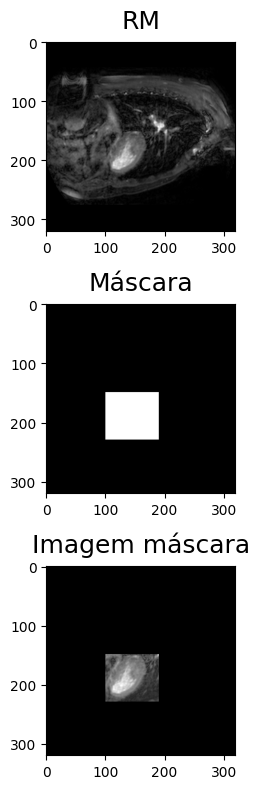

In [12]:
titles = ["RM", "Máscara", "Imagem máscara"]
showImages([image, mask, cv2.bitwise_and(image, image, mask=mask)], titles, size=(8, 8), grid=(3,1))

### Histograma de máscara (RGB)

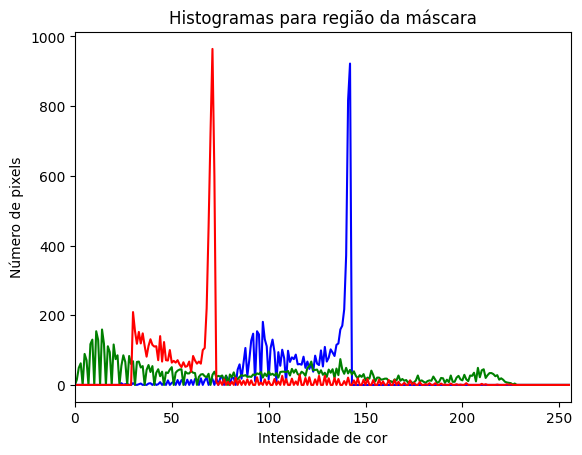

In [13]:
image = cv2.imread('la_023.png')

mask = np.zeros(image.shape[:2], np.uint8)

mask[150:230, 100:190] = 255

hist_mask_b = cv2.calcHist([image], [0], mask, [256], [0, 256])
hist_mask_g = cv2.calcHist([image], [1], mask, [256], [0, 256])
hist_mask_r = cv2.calcHist([image], [2], mask, [256], [0, 256])

plt.figure()
plt.title('Histogramas para região da máscara')
plt.xlabel('Intensidade de cor')
plt.ylabel('Número de pixels')

plt.plot(hist_mask_b, color='b')
plt.plot(hist_mask_g, color='g')
plt.plot(hist_mask_r, color='r')

plt.xlim([0, 256])
plt.show()

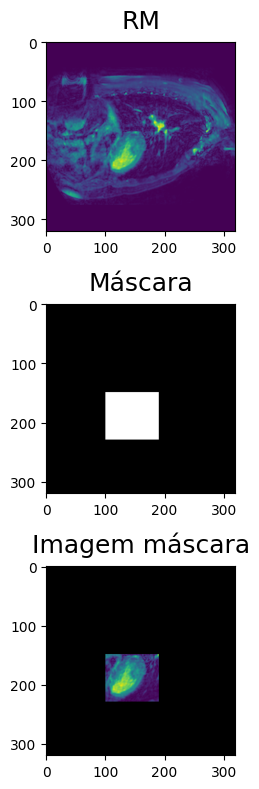

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
titles = ["RM", "Máscara", "Imagem máscara"]
showImages([image, mask, cv2.bitwise_and(image, image, mask=mask)], titles, size=(8, 8), grid=(3,1))

## Equalização de Histograma

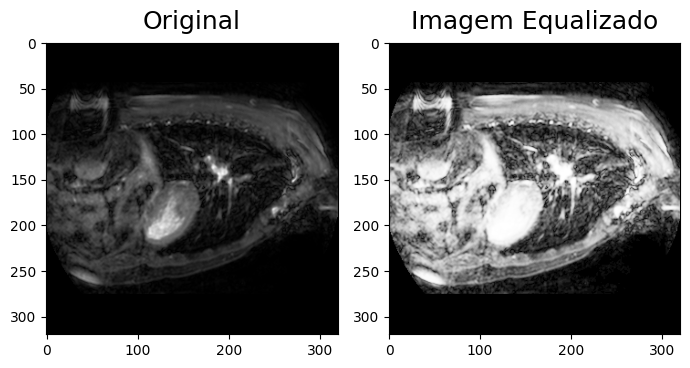

In [16]:
image = cv2.imread('la_023.png', 0)

equ = cv2.equalizeHist(image)

showImages([image, equ], ['Original', 'Imagem Equalizado'], size=(7,4), grid=(1,2))

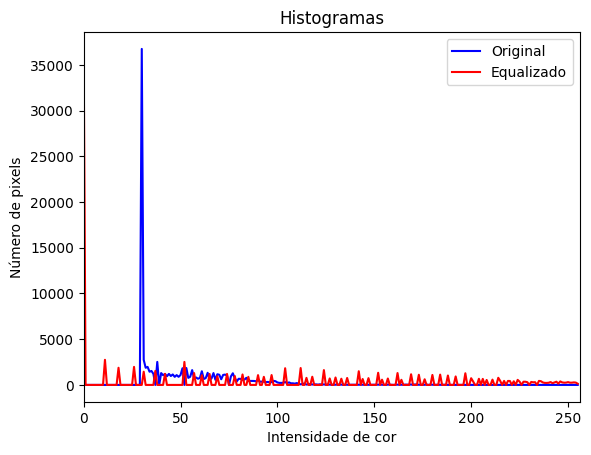

In [17]:
hist_image = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equ], [0], None, [256], [0, 256])

plt.figure()
plt.title('Histogramas')
plt.xlabel('Intensidade de cor')
plt.ylabel('Número de pixels')

plt.plot(hist_image, color='b', label='Original')
plt.plot(hist_equ, color='r', label='Equalizado')

plt.legend()
plt.xlim([0, 256])
plt.show()

### Equalização de Histograma em Imagem Colorida

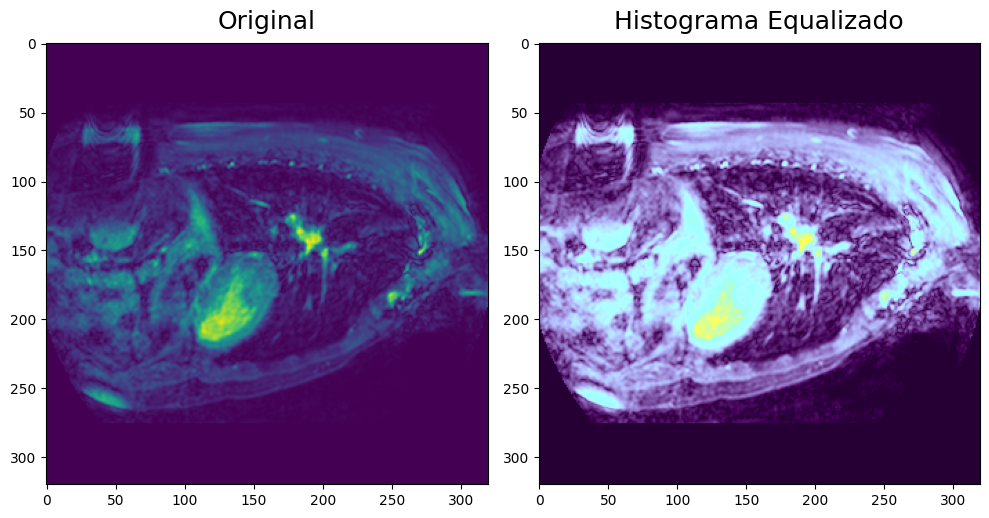

In [18]:
image = cv2.imread('la_023.png')

ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])

equ = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
showImages([image, equ], ['Original', 'Histograma Equalizado'], size=(10,5), grid=(1,2))

### Comparação do Histograma de 2 imagens

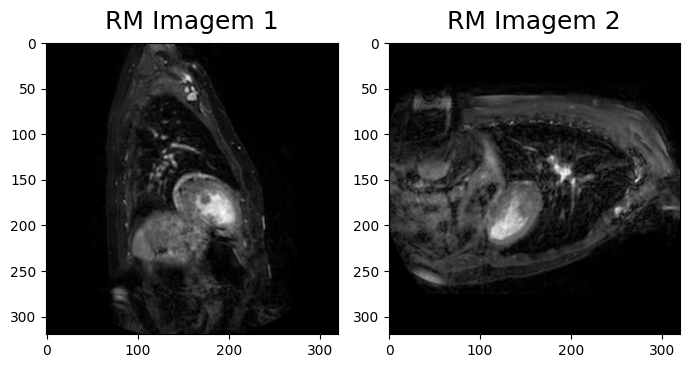

In [19]:
image1 = cv2.imread('3_slice_19.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('la_023.png', cv2.IMREAD_GRAYSCALE)

showImages([image1, image2], ['RM Imagem 1', 'RM Imagem 2'], size=(7,4), grid=(1,2))

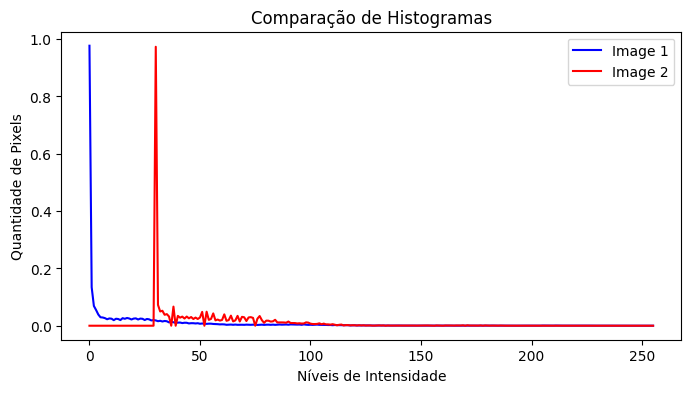

In [20]:
hist1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

hist1 = cv2.normalize(hist1, hist1)
hist2 = cv2.normalize(hist2, hist2)

plt.figure(figsize=(8,4))

plt.plot(hist1, color='blue', label='Image 1')
plt.plot(hist2, color='red', label='Image 2')

plt.title('Comparação de Histogramas')
plt.xlabel('Níveis de Intensidade')
plt.ylabel('Quantidade de Pixels')
plt.legend()

plt.show()

### Correlação, Chi-Quadrado, Intersecção e Distância de Bhattacharyya

In [21]:
correl = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
print('Correlação:', correl)

chi_square = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
print('Chi-Quadrado:', chi_square)

intersect = cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
print('Intersecção:', intersect)

bhattacharyya = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
print('Bhattacharyya:', bhattacharyya)

Correlação: 0.005020105377705082
Chi-Quadrado: 56.59175938438768
Intersecção: 0.4928057362722029
Bhattacharyya: 0.7765121965578269
